<img src="../images/CONFIDENTDATASCIENCE.png" alt="An image that reads Confident Data Science: The Essential Skills of Data Science, Companion Jupyter Notebook + Coding Examples. Also shows book image."/>

## Chapter 9 *Data*

To give citation to these coding examples give reference to an appropriate chapter and page of:

*Confident Data Science: Discover the essential skills of data science* <br>
(Confident Series, 15) 1st Edition by Adam Ross Nelson (Author) <br>
Publisher : Kogan Page (September 26, 2023).

## Relative Utility + Type Converstions

In [1]:
# Import the Pandas and Seaborn libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Open data from online.
df = pd.read_csv('https://raw.githubusercontent.com/' + \
                 'mwaskom/seaborn-data/master/mpg.csv')

# Demonstrate the continuous nature of this data with summary statistics.
df[['weight']].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
weight,398.0,2970.424623,846.841774,1613.0,2223.75,2803.5,3608.0,5140.0


In [2]:
# Examine summary statistics for weight by place of manufacture
df.groupby('origin').describe()['weight']


,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,2423.300000,490.043191,1825.0,2067.25,2240.0,2769.75,3820.0
japan,79.0,2221.227848,320.497248,1613.0,1985.00,2155.0,2412.50,2930.0
usa,249.0,3361.931727,794.792506,1800.0,2720.00,3365.0,4054.00,5140.0


<AxesSubplot:xlabel='weight', ylabel='origin'>

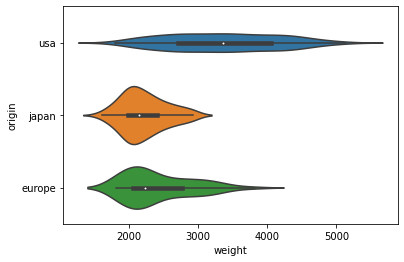

In [3]:
# Demonstrate the continuous nature of this data with violin plots.
sns.violinplot(data=df,
               x='weight',
               y='origin')


### Continuous To Ordinal

In [4]:
# Use pd.cut to establish bins, the label option names those bins
df['weight_cat'] = pd.cut(df['weight'], 5, 
                          labels=['Very Light','Light',
                                  'Moderate','Heavy',
                                  'Very Heavy'])

# Produce a crosstabulation that displays how weight may relate to origin
pd.crosstab(df['origin'], df['weight_cat'])


weight_cat,Very Light,Light,Moderate,Heavy,Very Heavy
origin,,,,,
europe,39,21,9,1,0
japan,53,26,0,0,0
usa,29,66,68,62,24


### Nominal To Binary

In [5]:
# Frequently used data science imports.
import pandas as pd
import seaborn as sns

# Open data from online.
df = pd.read_csv('https://raw.githubusercontent.com/' + \
                 'mwaskom/seaborn-data/master/mpg.csv')

# Create a nominal binary from the multi-categorical nominal original
df['origin2'] = df['origin'].map({'usa':'us',
                                  'japan':'abroad',
                                  'europe':'abroad'})

# Show the results
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin2
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,us
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,us
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,us
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,us
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,us
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,us
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,abroad
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,us
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,us


In [6]:
# Use list comprehension to create nominal binary from the multi-categorical nominal
df['origin3'] = ['us' if x == 'usa' else 'abroad' for x in df['origin']]

# Use np.where() to create nominal binary from the multi-categorical nominal
df['origin4'] = np.where(df['origin'] == 'usa','us','abroad')


## Popular Data Sources

### FiveThirtyEight

In [7]:
# U.S. House of Representative election predictions
house = pd.read_csv('https://projects.fivethirtyeight.com/' +
                    'polls/data/house_polls_historical.csv')

# Display an excerpt of the data
house.sample(5)


,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,methodology,...,election_date,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,party,answer,candidate_id,candidate_name,pct
2159,56462,914,Stockton University,NaN,NaN,Stockton University,317,Stockton University,A/B,Live Phone,...,11/6/18,general,False,False,NaN,DEM,Van Drew,11867,Jeff Van Drew,55.10
2484,56043,1424,Siena College/NYT Upshot,NaN,NaN,Siena College/The New York Times Upshot,448,Siena College/The New York Times Upshot,A+,Live Phone,...,11/6/18,general,False,False,NaN,DEM,Underwood,11171,Lauren Underwood,42.56
1692,67857,940,Lake Research,NaN,NaN,Lake Research Partners,165,Lake Research Partners,A/B,Online,...,11/3/20,general,False,False,NaN,REP,McClintock,14884,Tom McClintock,46.00
2956,53968,320,Monmouth U.,NaN,NaN,Monmouth University,215,Monmouth University,A,Live Phone,...,11/6/18,general,False,False,NaN,REP,Faso,11229,John J. Faso,43.00
3219,53468,320,Monmouth U.,NaN,NaN,Monmouth University,215,Monmouth University,A,Live Phone,...,8/7/18,general,False,False,NaN,REP,Balderson,18222,Troy Balderson,46.00


In [8]:
# U.S. Senate election predictions
senate = pd.read_csv('https://projects.fivethirtyeight.com/' +
                     'polls/data/senate_polls_historical.csv')

# Display an excerpt of the data
senate.sample(5).transpose()


,3208,2972,3822,6030,627
poll_id,70992,70787,68005,53735,81145
pollster_id,1472,525,1102,299,1250
pollster,MSU - Bozeman,U. New Hampshire,Emerson College Polling Society,Mellman,Trafalgar Group
sponsor_ids,NaN,NaN,NaN,NaN,NaN
sponsors,NaN,NaN,NaN,NaN,NaN
display_name,Montana State University Bozeman,University of New Hampshire,Emerson College,Mellman Group,Trafalgar Group
pollster_rating_id,486.0,357.0,88.0,205.0,338.0
pollster_rating_name,Montana State University Bozeman Human Ecology...,University of New Hampshire Survey Center,Emerson College,Mellman Group,Trafalgar Group
fte_grade,NaN,B-,A-,B/C,A-
methodology,Mail,Online,IVR/Online,NaN,IVR/Online/Text/Live Phone


In [9]:
# Display the columns in senate
senate.columns

Index(['poll_id', 'pollster_id', 'pollster', 'sponsor_ids', 'sponsors',
       'display_name', 'pollster_rating_id', 'pollster_rating_name',
       'fte_grade', 'methodology', 'state', 'start_date', 'end_date',
       'sponsor_candidate_id', 'sponsor_candidate', 'sponsor_candidate_party',
       'question_id', 'sample_size', 'population', 'subpopulation',
       'population_full', 'tracking', 'created_at', 'notes', 'url', 'source',
       'internal', 'partisan', 'race_id', 'cycle', 'office_type',
       'seat_number', 'seat_name', 'election_date', 'stage',
       'nationwide_batch', 'ranked_choice_reallocated', 'ranked_choice_round',
       'party', 'answer', 'candidate_id', 'candidate_name', 'pct'],
      dtype='object')

In [10]:
house['methodology'].value_counts()

Live Phone                    1531
Online                         383
IVR/Online                     229
Live Phone/Online              218
IVR                            189
IVR/Live Phone                 112
IVR/Text                       110
Text                            11
Face-to-face                     9
IVR/Live Phone/Online            8
Live Phone/Text                  5
IVR/Online/Text/Live Phone       4
IVR/Online/Live Phone            2
Live Phone/Online/Text           2
Mail                             2
IVR/Live Phone/Text              2
Name: methodology, dtype: int64

In [11]:
# World Cup tournament predictions
cup = pd.read_csv('https://projects.fivethirtyeight.com/' + \
                  'soccer-api/international/2022/wc_matches.csv')

# Display an excerpt of the data
cup.sample(5)


,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
57,2022-12-09,1908,FIFA World Cup,Netherlands,Argentina,84.19,87.32,0.4238,0.5762,0.0000,1.04,1.31,2,2,0.43,1.52,1.29,1.79,2.10,2.03
17,2022-11-25,1908,FIFA World Cup,Qatar,Senegal,48.16,73.23,0.2098,0.5228,0.2674,0.96,1.66,1,3,0.94,0.75,1.06,1.28,1.05,2.81
20,2022-11-26,1908,FIFA World Cup,Tunisia,Australia,66.48,58.65,0.3883,0.2894,0.3223,1.16,0.96,0,1,0.89,0.50,1.30,0.65,0.00,1.05
42,2022-12-01,1908,FIFA World Cup,Costa Rica,Germany,52.90,88.86,0.0512,0.8045,0.1442,0.50,2.55,2,4,1.27,4.41,0.33,5.90,2.10,3.72
60,2022-12-13,1908,FIFA World Cup,Argentina,Croatia,87.46,79.37,0.6426,0.3574,0.0000,1.33,0.84,3,0,1.69,0.53,1.30,1.16,3.15,0.00


### UC Irvine Machine Learning Repository

In [12]:
# Chemical analysis of wine samples
wine = pd.read_csv('https://archive.ics.uci.edu/ml/' + \
                   'machine-learning-databases/wine/wine.data',
                   names=['Alcohol','MalicAcid','Ash','Alcalinity',
                          'Magnesium','TotPhenols','Flavanoids',
                          'NonFlavanoidPhen','Proanthocyanins','Color',
                          'Hue','OD280_OD315','Proline'])

# Display an excerpt of the data
wine.sample(5)

,Alcohol,MalicAcid,Ash,Alcalinity,Magnesium,TotPhenols,Flavanoids,NonFlavanoidPhen,Proanthocyanins,Color,Hue,OD280_OD315,Proline
3,13.62,4.95,2.35,20.0,92,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550
3,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500
3,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695
1,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150
2,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450


### Additional Libraries

#### Seaborn

In [13]:
# Get a list of Seaborn data sets
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [14]:
# Load and display the mpg data from sns.load_dataset()
sns.load_dataset('mpg').sample(5)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
270,21.1,4,134.0,95.0,2515,14.8,78,japan,toyota celica gt liftback
12,15.0,8,400.0,150.0,3761,9.5,70,usa,chevrolet monte carlo
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
225,17.5,6,250.0,110.0,3520,16.4,77,usa,chevrolet concours


In [15]:
# Load and display the mpg data from Seaborn's GitHub
pd.read_csv('https://raw.githubusercontent.com/' + \
            'mwaskom/seaborn-data/master/mpg.csv').sample(5)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d
82,23.0,4,120.0,97.0,2506,14.5,72,japan,toyouta corona mark ii (sw)
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl
94,13.0,8,440.0,215.0,4735,11.0,73,usa,chrysler new yorker brougham
361,25.4,6,168.0,116.0,2900,12.6,81,japan,toyota cressida


#### People Analytics Data

In [8]:
# import peopleanalyticsdata package
import peopleanalyticsdata as pad
import pandas as pd

print(f'There are {len(pad.list_sets())} data sets in this library.', 
      end='\n\n')

# see a list of data sets
print(pad.list_sets())


There are 16 data sets in this library.

['charity_donation', 'employee_survey', 'health_insurance', 'job_retention', 'managers', 'politics_survey', 'salespeople', 'soccer', 'sociological_data', 'speed_dating', 'ugtests', 'employee_performance', 'learning', 'graduates', 'promotion', 'recruiting']


In [6]:
# load data into a dataframe
df = pad.managers()

df.sample(6)


,employee_id,performance_group,yrs_employed,manager_hire,test_score,group_size,concern_flag,mobile_flag,customers,high_hours_flag,transfers,reduced_schedule,city
422,fcd29ebc,Top,5.5,N,326,13,N,N,28,Y,0,N,Toronto
440,2831f170,Middle,4.9,N,129,9,N,N,28,Y,0,Y,San Francisco
508,642614af,Middle,5.0,N,280,9,Y,N,16,Y,2,N,Toronto
542,aaa3534f,Top,4.6,N,258,13,Y,N,24,Y,0,N,New York
455,6e43d0eb,Bottom,4.5,N,182,17,N,N,32,Y,0,N,New York
357,c77cc0c6,Middle,4.7,N,250,10,N,Y,22,Y,0,N,Toronto


## Social Media Data

In [15]:
# Load ConfidentDataCh9Social.csv
df = pd.read_csv('ConfidentDataCh9Social.csv', 
                 infer_datetime_format=True)

# Show the results
df.sample(8)


,Date,ShareCommentary,Reactions,Comments,User
173,2021-06-03,First-time claims for unemployment insurance t...,2.0,2.0,1030
163,2021-08-12,Networking and building professional relations...,3.0,1.0,1051
16,2022-07-26,My kids love those stupid aqua beads. Have yo...,27.0,21.0,1020
177,2021-03-30,"Contributions to Labor Productivity Growth, Pr...",5.0,3.0,1030
97,2021-08-19,First-time claims for unemployment insurance t...,10.0,3.0,1031
115,2021-05-03,🔍🔊 As a data scientist you have to own the pro...,6.0,5.0,1011
19,2021-07-13,Last night my 11 year-old daughter and I watch...,27.0,17.0,1020
157,2021-08-19,First-time claims for unemployment insurance t...,3.0,2.0,1030


In [16]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Reactions,194.0,12.695876,17.940179,1.0,5.0,8.0,15.0,219.0
Comments,194.0,7.515464,23.817142,1.0,2.0,3.0,6.0,316.0
User,194.0,1032.809278,14.484929,1010.0,1020.0,1031.0,1050.0,1051.0


In [4]:
# Additionally import Google cloud libraries
from google.cloud import language_v1
from google.protobuf.json_format import MessageToDict

# Specify a services.json location (also referenced in subsequent code blocks)
sl = '../services/services.json'

# Function to collect document-level analysis using Google API
def google_api_document_scores(series: pd.Series) -> pd.DataFrame:
    """Returns sentiment scores of a given text using the Google 
    Cloud API.

    Takes the text data contained within the provided Pandas Series 
    and returns a DataFrame reporting sentiment scores for each item
    in the original Series. The DataFrame will have an index that matches
    the Series index.

    Parameters
    ----------
    series : pd.Series
        Pandas Series containing text data to be analyzed by the Google Cloud API.
    
    Returns
    ----------
    doc_scores_df : pd.DataFrame
        DataFrame reporting each document's resulting sentiment scores.
    """

    # Instantiate Google Cloud API's client
    client = language_v1.LanguageServiceClient.from_service_account_json(sl)

    # Define lists that will contain each sentence’s sentimento results.
    index = []
    documents = []
    doc_sentiment_scores = []
    doc_magnitude_scores = []

    # Loop through each Series item; have Google Cloud API analyze 
    # sentiment scores
    for i in series.index:

        # Take the next item in the Pandas Series
        my_text = series.loc[i]  
        # Create a Google Cloud document from the text
        document = language_v1.Document(content=my_text, 
                                        type_=language_v1.Document.Type.PLAIN_TEXT)
        # Send the document to Google's API
        a_doc_sentiment = client.analyze_sentiment(request={'document':document}).document_sentiment

        # Extract sentment and magnitude scores for each document
        doc_magnitude = a_doc_sentiment.magnitude
        doc_score = a_doc_sentiment.score
        
        # Append scores to respective lists; The origianl text
        documents.append(my_text)
        # Append the sentiment scores
        doc_sentiment_scores.append(doc_score)
        # Append the magnitude scores
        doc_magnitude_scores.append(doc_magnitude)
        # Append the index list
        index.append(i)

    # Compile results of the entire analysis in easily-readable Pandas df
    doc_scores_df = pd.DataFrame({'index':index,
                             'Documents':documents,
                             'Sentiment':doc_sentiment_scores,
                             'Magnitude':doc_magnitude_scores}).set_index('index')

    # Return the resulting DataFrame
    return doc_scores_df


In [5]:
# Import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import NLTK's sentence tokenizer
from nltk.tokenize import sent_tokenize


# Function to perform document level analysis using NLTK
# Name the function post_scores
def post_scores(series: pd.Series) -> pd.DataFrame:
    '''Returns sentiment scores of a given text using NLTK’s
    VADER sentiment analysis tools.

    Takes a Pandas Series that contains text data. Returns a 
    Pandas DataFrame that reports sentiment scores for item
    withi the Pandas Seires. The DataFrame will havean index 
    that matches the Series index.
    
    Parameters
    ----------
    Series : pd.Series
        Pandas Series containing text data to be analyzed using
        NLTK’s VADER sentiment analysis tools.

    Returns
    ----------
    doc_scores_df : pd.DataFrame
        DataFrame reporting each document's resulting sentiment scores.
    '''

    # Define empty lists that will contain each entry’s result.
    index = []
    posts = []
    neg_scores = []
    neu_scores = []
    pos_scores = []
    compounds = []
    
    # Instantiate the analyzer.
    sid = SentimentIntensityAnalyzer()
    
    # Loop through each item in the Series.
    for i in series.index:

        # Extract scores for each sentence; append to lists.
        try:
            # Get sentiment scores from NLTK
            scores = sid.polarity_scores(series.loc[i])
            # Append the index list
            index.append(i)
            # Append the original text
            posts.append(series.loc[i])
            # Append the negative scores list
            neg_scores.append(scores['neg'])
            # Append the neutral scores list
            neu_scores.append(scores['neu'])
            # Append the positive scores list
            pos_scores.append(scores['pos'])
            # Append the positive scores list
            compounds.append(scores['compound'])
        
        # When there is an error, skip that entry.
        except:
            pass
    
    # Compile & return Pandas DataFrame
    return(pd.DataFrame({'index':index,
                         'Sentence':posts,
                         'Negative':neg_scores,
                         'Neutral':neu_scores,
                         'Positive':pos_scores,
                         'Compound':compounds}).set_index('index'))


In [26]:
# Collect sentiment data using Google API
results_google = google_api_document_scores(df['ShareCommentary'])


In [29]:
# Collect sentiment data using NLTK
results_nltk = post_scores(df['ShareCommentary'])


In [32]:
# Add identifier suffix to the columns
results_google = results_google.add_suffix('_ggl')
results_nltk = results_nltk.add_suffix('_nltk')

In [40]:
# Concatenate the results
concatenated = pd.concat([df,
                          results_google[['Sentiment_ggl',
                                          'Magnitude_ggl']],
                          results_nltk[['Negative_nltk',
                                        'Neutral_nltk',
                                        'Positive_nltk',
                                        'Compound_nltk']]], 
                          axis=1)


In [58]:
# Save the results to disk
concatenated.to_csv('ConfidentDataCh9SocialSents_Pub.csv', 
                    index=False)

In [59]:
# Show the results
concatenated.sample(8)

,Date,ShareCommentary,Reactions,Comments,User,Sentiment_ggl,Magnitude_ggl,Negative_nltk,Neutral_nltk,Positive_nltk,Compound_nltk
67,2020-12-28,This is the second of three posts for the mont...,7.0,2.0,1010,0.0,4.5,0.031,0.849,0.120,0.9557
118,2020-08-20,Work-life balance and time management techniqu...,9.0,1.0,1050,0.6,2.5,0.000,0.829,0.171,0.9286
30,2020-01-08,Commuting to work is such a miserable experien...,22.0,5.0,1050,-0.3,1.8,0.193,0.725,0.083,-0.8627
94,2021-12-22,Free event (starting in 10 minutes) #machinele...,5.0,0.0,1031,-0.1,0.7,0.029,0.925,0.046,0.2960
21,2021-08-23,"Today's post is about customer service, and a ...",23.0,28.0,1020,-0.3,13.7,0.013,0.938,0.049,0.9153
85,2021-03-08,"Okay, everyone! You know how SG Acme talks ab...",4.0,0.0,1021,0.0,5.2,0.091,0.785,0.124,0.6221
137,2021-01-01,"Any friends on scrambling at the last minute, ...",2.0,0.0,1020,0.2,1.4,0.000,0.710,0.290,0.9617
70,2021-02-04,In a million ways my data science career has n...,8.0,1.0,1011,0.0,4.0,0.028,0.922,0.049,0.5362


In [60]:
# Output the information on concatenated
concatenated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 171
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             194 non-null    object 
 1   ShareCommentary  194 non-null    object 
 2   Reactions        194 non-null    float64
 3   Comments         194 non-null    float64
 4   User             194 non-null    int64  
 5   Sentiment_ggl    194 non-null    float64
 6   Magnitude_ggl    194 non-null    float64
 7   Negative_nltk    194 non-null    float64
 8   Neutral_nltk     194 non-null    float64
 9   Positive_nltk    194 non-null    float64
 10  Compound_nltk    194 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 18.2+ KB


In [ ]:
# Save the results from this code
pd.to_csv('../data/confident_ch9socialsents.csv')

## Update + Change Log

March, 2023 - Created notebook.<br>
April, 2023 - Prepared for GitHub.